### Student Information
Name: Tsegaye Semere

Student ID: 113162862

GitHub ID:tsegayesemere

### All the answers are based on <span style="color:white;background-color:blue;">twenty_train dataset</span>

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nk02205\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Foundations

In [2]:
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

c:\Users\nk02205\Documents\DM2025LabsDemo\DM2025-Lab1-Exercise\.venv\Scripts\python.exe
3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]


### **Exercise 1**
Please print out the *text* data for the first three samples in the dataset.

### Answer for <span style="color:blue;background-color:white;">Exercise 1</span>

In [3]:
twenty_train.data[0:3]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [4]:
from colorama import Fore, Back, Style
for i in range(3):
    print (Fore.BLACK + Back.YELLOW + f"Message {i+1}" + Style.RESET_ALL)
    print("\n".join(twenty_train.data[i].split("\n")))

Message 1
From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

Message 2
From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectan

### **Exercise 2** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation]

### Answer for <span style="color:blue;background-color:white;">Exercise 2</span>

In [5]:
X.groupby('category_name').size().reset_index(name='Number_of_counts')

,category_name,Number_of_counts
0,alt.atheism,480
1,comp.graphics,584
2,sci.med,594
3,soc.religion.christian,599


### **Exercise 3**  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

### Answer for <span style="color:blue;background-color:white;">Exercise 3</span>

In [6]:
All_scimed=X[X["category_name"] == "sci.med"]
All_tenth=All_scimed.iloc[::10]
Top_5=All_tenth.iloc[:5]
print(Top_5.iloc[0:5])

                                                  text  category category_name
7    From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
49   From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2       sci.med
82   From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2       sci.med
118  From: rogers@calamari.hi.com (Andrew Rogers) S...         2       sci.med
142  From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2       sci.med


### **Exercise 4** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.

### Answer for <span style="color:blue;background-color:white;">Exercise 4</span>

In [7]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### **Exercise 5 (take home)** 
Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

### Answer for <span style="color:blue;background-color:white;">Exercise 5</span>

What I have observed in the example is
* index 0 is explicitly set to NaN 
* index 1 has no value provided
* index 4 is assigned None using the Python keyword.

The other indices are all assigned with different values. However, when viewed in a table, indices 2 and 3 may look like missing values, but they are not: 
* index 2 actually contains the string "NaN"
* index 3 contains the string "None". Similarly
* index 5 is not missing either—it is assigned an empty string ("").

### **Exercise 6**
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`.

### Answer for <span style="color:blue;background-color:white;">Exercise 6</span>

1. All records in X_sample are also available in X but not the reverse
2. Records of X are stored sequentialy based on index but elements of X_sample are shuffled randomly.
3. So I can see that X_sample is simply 1000 randomly taken records of X

### **Exercise 7**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

### Answer for <span style="color:blue;background-color:white;">Exercise 7</span>

for X


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

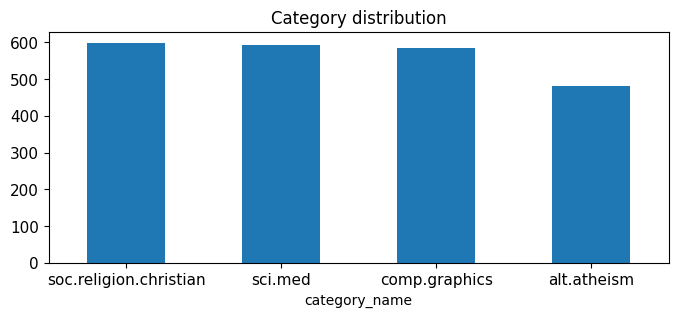

In [8]:
# We can remove the ylim = [0, 700] parameter. if we omit this parameter 
# Pandas/Matplotlib will  automatically set the values
from colorama import Fore, Back, Style
print (Fore.BLACK + Back.YELLOW + "for X" + Style.RESET_ALL)
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    rot = 0, fontsize = 11, figsize = (8,3))

### **Exercise 8** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

### Answer for <span style="color:blue;background-color:white;">Exercise 8</span>

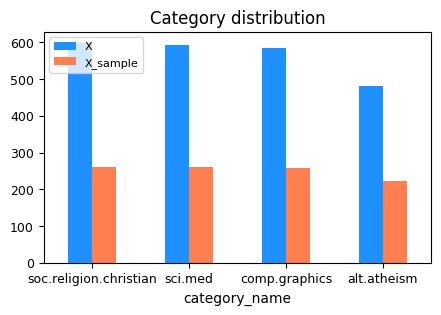

In [9]:
# Answer here
X_sample = X.sample(n=1000) #random state
x_counts = X['category_name'].value_counts()
x_sample_counts = X_sample['category_name'].value_counts()

# Combine into a single DataFrame
All_counts = pd.DataFrame({
    'X': x_counts,
    'X_sample': x_sample_counts
}).fillna(0)  # fill 0 if a category is missing in one of the datasets

# Plot grouped bar chart
draw_graph = All_counts.plot(
    kind='bar',
    figsize=(5,3),
    rot=0,
    fontsize=9,
    title='Category distribution',
    color=['dodgerblue', 'coral'],  # different colors
    width=0.5
)
draw_graph.legend(loc='upper left', fontsize=8)


### **Exercise 9**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

### Answer for <span style="color:blue;background-color:white;">Exercise 9</span>

In [10]:
count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
t1=X.loc[0,"text"]
print(analyze(t1))

['from', 'sd345', 'city', 'ac', 'uk', 'michael', 'collier', 'subject', 'converting', 'images', 'to', 'hp', 'laserjet', 'iii', 'nntp', 'posting', 'host', 'hampton', 'organization', 'the', 'city', 'university', 'lines', '14', 'does', 'anyone', 'know', 'of', 'good', 'way', 'standard', 'pc', 'application', 'pd', 'utility', 'to', 'convert', 'tif', 'img', 'tga', 'files', 'into', 'laserjet', 'iii', 'format', 'we', 'would', 'also', 'like', 'to', 'do', 'the', 'same', 'converting', 'to', 'hpgl', 'hp', 'plotter', 'files', 'please', 'email', 'any', 'response', 'is', 'this', 'the', 'correct', 'group', 'thanks', 'in', 'advance', 'michael', 'michael', 'collier', 'programmer', 'the', 'computer', 'unit', 'email', 'collier', 'uk', 'ac', 'city', 'the', 'city', 'university', 'tel', '071', '477', '8000', 'x3769', 'london', 'fax', '071', '477', '8565', 'ec1v', '0hb']


### **Exercise 10**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

### Answer for <span style="color:blue;background-color:white;">Exercise 10</span>

In [11]:
X_counts = count_vect.fit_transform(X.text)
count_vect.get_feature_names_out()[X_counts[5,0]]

'000'

### **Exercise 11** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

### Answer for <span style="color:blue;background-color:white;">Exercise 11</span>

In [12]:
# We can use different ways of visualization styles. I am proposing the following interactivity
# heatmaps code with capabilities of (zoom, hover tooltips) 
# It looks better because of its interactivity and it takes relatively lower processing time
# comparing to the static heatmaps code above:
import plotly.express as px

df_todraw = pd.DataFrame(
    X_counts[0:500, 0:500].toarray(),
    columns=[f"term_{i}" for i in range(500)],
    index=[f"doc_{i}" for i in range(500)]
)

hstg = px.imshow(df_todraw, 
                color_continuous_scale="Viridis",
                aspect="auto")
hstg.update_layout(title="Interactive term-document heatmap")

### **Exercise 12**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

### Answer for <span style="color:blue;background-color:white;">Exercise 12</span>

In [13]:
import plotly.express as px
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
terms = count_vect.get_feature_names_out()[:300]
freqs = term_frequencies[:300]

df = pd.DataFrame({
    "Term": terms,
    "Frequency": freqs
})

# Interactive bar chart
chart = px.bar(
    df,
    x="Term",
    y="Frequency",
    labels={"Term": "Terms", "Frequency": "Frequency"},
)

# Update layout for better readability
chart.update_layout(
    xaxis_tickangle=90,
    width=800,
    height=300
)

### **Exercise 13** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

### Answer for <span style="color:blue;background-color:white;">Exercise 13</span>

In [14]:
# Displaying only the top N terms or setting a minimum frequency threshold are both valid 
# approaches to reduce the number of terms shown in a visualization. Personally, I prefer 
# setting a minimum frequency threshold, because limiting the view to just the top N terms 
# might cause us to lose important but less frequent terms that are overshadowed by very 
# high-frequency ones. The code is shown below:

import tkinter as tk
from tkinter import simpledialog


input_window  = tk.Tk() # Create a hidden root window
input_window.withdraw()  # hide main window

threshold = int(simpledialog.askstring("Input", "Enter minimum frequency of words that you want to appear in your chart:"))

Full_list = pd.DataFrame({
    "Term": count_vect.get_feature_names_out(),
    "Frequency": term_frequencies
})
Filtered_lists = Full_list[Full_list["Frequency"] >= threshold]
print("Befor filter: ",len(Full_list),"\nAfter filter: ",len(Filtered_lists))
chart = px.bar(
    Filtered_lists,
    x="Term", y="Frequency",
    title=f"Terms with frequency ≥ {threshold}"
)
chart.update_layout(xaxis_tickangle=90)

Befor filter:  35788 
After filter:  143


### **Exercise 14** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

### Answer for <span style="color:blue;background-color:white;">Exercise 14</span>

In [15]:
terms = count_vect.get_feature_names_out()
freqs = term_frequencies

# Combine into DataFrame
df_terms = pd.DataFrame({
    "Term": terms,
    "Frequency": freqs
})

sorted_list = df_terms.sort_values("Frequency", ascending=False) # Sort by frequency (descending)
chart_plot = sorted_list.head(1000).reset_index(drop=True)
# Create a group column: first 25% = blue, last 75% = yellow
borderr = int(len(chart_plot) * 0.15)
chart_plot["ColorGroup"] = np.where(chart_plot.index < borderr, "First 25%", "Last 75%")

# Interactive bar chart
chart = px.area(
    chart_plot,
    x="Term",
    y="Frequency",
    color="ColorGroup",  # use the new group column
    color_discrete_map={"First 25%": "greenyellow", "Last 75%": "yellow"},
)

chart.update_layout(
    xaxis=dict(
        #showticklabels=False,
        showgrid=False
        #title=None
    ),
    yaxis=dict(
        #showticklabels=False,
        showgrid=False
        #title=None
    ),
    plot_bgcolor='rgba(0,0,0,0)',  # remove plot background color
    paper_bgcolor='rgba(0,0,0,0)', # remove outer background color
    showlegend=False,        # remove legend 
)

### >>> **Exercise 15** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

### Answer for <span style="color:blue;background-color:white;">Exercise 15</span>

In [83]:
# Converting the frequeny values in to log significantly scales down the difference betwen the 
# uper and lower frequencies. 
# So have got a chart that doesn't have long tail and sharp head
# However log scale is preferable, we can also use sqrt and cube transforations to reduce skeewness 
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
terms = count_vect.get_feature_names_out()
freqs = term_frequencies_log

# Combine into DataFrame
df_terms = pd.DataFrame({
    "Term": terms,
    "Log_Frequency": freqs
})

sorted_list = df_terms.sort_values("Log_Frequency", ascending=False) # Sort by frequency (descending)
#top_n = 30  # number of terms to display
#plot = sorted_list
chart_plot = sorted_list.head(1000).reset_index(drop=True)

# Create a group column: first 25% = blue, last 75% = yellow
borderr = int(len(chart_plot) * 0.15)
chart_plot["ColorGroup"] = np.where(chart_plot.index < borderr, "First 25%", "Last 75%")

# Interactive bar chart
chart = px.area(
    chart_plot,
    x="Term",
    y="Log_Frequency",
    color="ColorGroup",  # use the new group column
    color_discrete_map={"First 25%": "greenyellow", "Last 75%": "yellow"},
)

chart.update_layout(
    xaxis=dict(
        #showticklabels=False,
        showgrid=False,
        color="White"
    ),
    yaxis=dict(
        #showticklabels=False,
        showgrid=False,
        color="White"
    ),
    plot_bgcolor='rgba(0,0,0,0)',  # remove plot background color
    paper_bgcolor='rgba(0,0,0,0)', # remove outer background color
    showlegend=False,        # remove legend 
)

# Phase 2

### **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

### Answer for <span style="color:blue;background-color:white;">Exercise 16</span>

In [1]:
### Begin Assignment Here
''' Answer here
when we investigate the top 5% of all four categories we found that thy have many words in common
We can take the following words as an example, I have simply taken the first few words from the top 5% list of each category
able, about,  above,  ac'  access,  actually,  address,  advance,  after,  algorithm,  algorithms,  all,  allows, 
already,  also, am, amiga, an 
all the above words are available in all categories at the top

But when we take a look at the bottom 1% words we can see that they are different across all categories
'''

" Answer here\nwhen we investigate the top 5% of all four categories we found that thy have many words in common\nWe can take the following words as an example, I have simply taken the first few words from the top 5% list of each category\nable, about, \xa0above, \xa0ac' \xa0access, \xa0actually, \xa0address, \xa0advance, \xa0after, \xa0algorithm, \xa0algorithms, \xa0all, \xa0allows, \nalready, \xa0also, am, amiga, an \nall the above words are available in all categories at the top\n\nBut when we take a look at the bottom 1% words we can see that they are different across all categories\n"

### **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance. For this you can find the following google collabs for reference provided by their github repository here: [FAE Top-K](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/topk/FAE.ipynb) and [MaxFPGrowth](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/maximal/MaxFPGrowth.ipynb)

### Answer for <span style="color:blue;background-color:white;">Exercise 17</span>

In [33]:
from PAMI.frequentPattern.topk import FAE  as alg
kCount=100  #Users can also specify this constraint between 0 to 1.
seperator='\t'
inputFile = "td_freq_db_comp_graphics.csv" 
top_k=[300, 450, 600]
for k in top_k:
    obj = alg.FAE(iFile=inputFile, k=k, sep=seperator)    #initialize
    obj.mine()            #Start the mining process
    obj.save(outFile=f'tse_frequentPatternsTopK{k}.txt')
    frequentPatternsDF= obj.getPatternsAsDataFrame()
    print(f'For k={k}:')
    print('Total No of patterns: ' + str(len(frequentPatternsDF)))
    print('Runtime: ' + str(obj.getRuntime()))
    print('Memory (RSS): ' + str(obj.getMemoryRSS()))
    print('Memory (USS): ' + str(obj.getMemoryUSS()))
''' The process of generating the top k consumes much time as the value of k increases
I have tried to run on 500, 1000, and 1500. But however, it generates the top 500 with in few 
seconds, it took more than an hour to generate the rest. So, I have been forced to lower the 
values of k to 300, 450, and 600 to get results relatively faster.

we can see the Runtime for 300, 450, and 600 which are 0.0657, 6.3143, and 89.8282 respectively.
where at at an increament of 150 patterns the runtime increases exponentially.

Their results are stored in tse_frequentPatternsTopK{k}.txt text files for reference
When we look at the resulting text files we can notice that 
top 300 goes up to maximum pattern of 4
top 450 still the same until pattern of 4
top 600 up to maximum pattern of 3 '''



 TopK frequent patterns were successfully generated using FAE algorithm.
For k=300:
Total No of patterns: 300
Runtime: 0.06578373908996582
Memory (RSS): 321196032
Memory (USS): 317190144
 TopK frequent patterns were successfully generated using FAE algorithm.
For k=450:
Total No of patterns: 450
Runtime: 6.314385414123535
Memory (RSS): 321355776
Memory (USS): 317263872
 TopK frequent patterns were successfully generated using FAE algorithm.
For k=600:
Total No of patterns: 600
Runtime: 89.82826209068298
Memory (RSS): 30388224
Memory (USS): 25243648


In [35]:
from PAMI.frequentPattern.basic import FPGrowth as alg
from PAMI.frequentPattern.maximal import MaxFPGrowth as maxfp_mod

minimumSupportCountList = [3, 6, 9]
for minSup in minimumSupportCountList:
    print("For minSup =",minSup)
    obj1 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
    obj1.mine()
    frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med)),"\t", #print the total number of patterns
        'Runtime: ' + str(obj1.getRuntime())) #measure the runtime
    obj1.save(f'tse_FPG_freq_db_comp_graphics_{minSup}.txt') #save the patterns
    obj1 = maxfp_mod.MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
    obj1.mine()
    frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med)),"\t", #print the total number of patterns
        'Runtime: ' + str(obj1.getRuntime())) #measure the runtime
    obj1.save(f'tse_MFpG_freq_db_comp_graphics_{minSup}.txt')
    print("============================================\n\n")

'''When we compare the number of patterns and runtime between FPG and MFpG, the results show 
that when minSup = 3, FPG generates an extremely large set of patterns compared to MFpG, 
and its runtime is also significantly higher. However, as the minSup value increases, both 
the number of patterns and the runtime become nearly equal. 
This indicates that a significant number of words in the comp_graphics category fall below pattern 6.

The resulting text files are stored as:

tse_FPG_freq_db_comp_graphics_{minSup}.txt

tse_MFpG_freq_db_comp_graphics_{minSup}.txt
'''

For minSup = 3
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 3742517 	 Runtime: 3.7592084407806396
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 626 	 Runtime: 0.11374855041503906


For minSup = 6
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 65 	 Runtime: 0.0
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 65 	 Runtime: 0.0


For minSup = 9
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 3 	 Runtime: 0.0
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 3 	 Runtime: 0.0




### Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [39]:
# The following line of codes are fetched from previous questions to help me run my codes 
# for Q18 simply 
takeminSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()

obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()

obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()

obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [40]:
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]

pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)
# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

### Answer for <span style="color:blue;background-color:white;">Exercise 18</span>

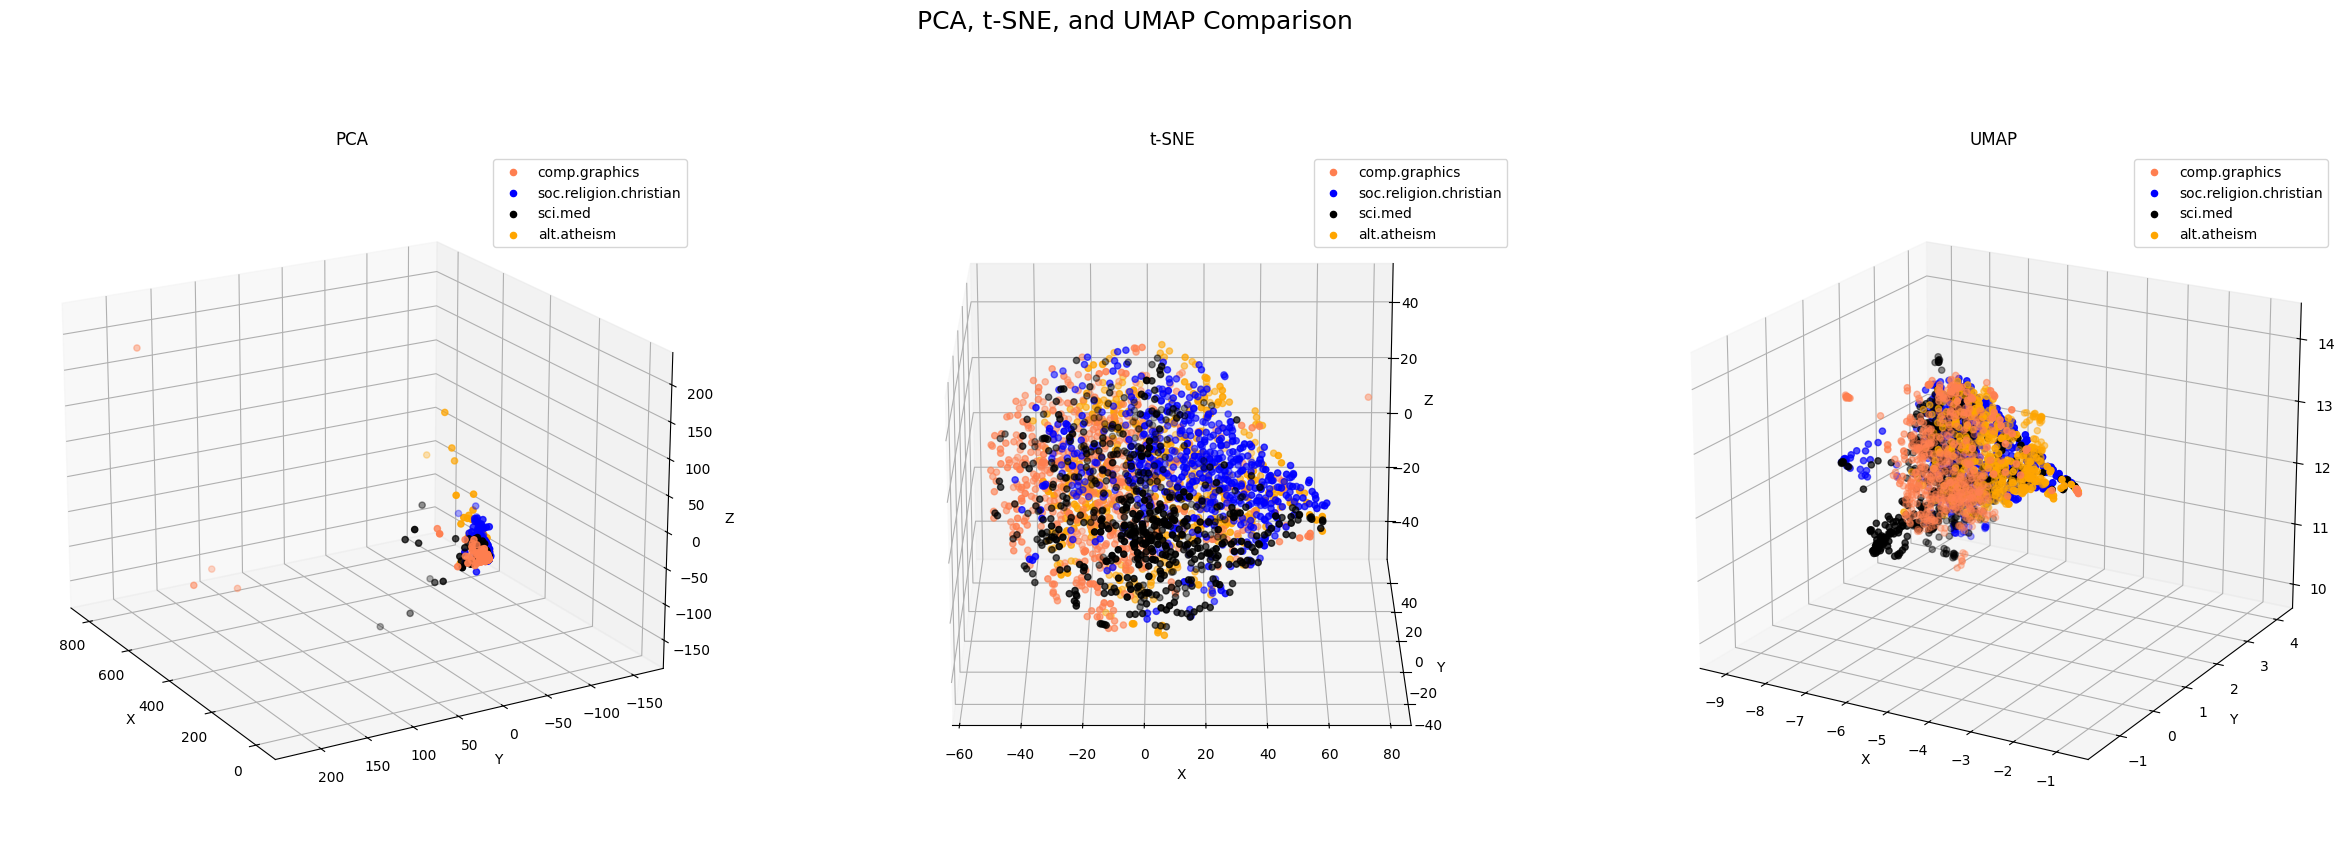

In [ ]:
# Answer for Q 18 starts from here 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

X_pca_tdm = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

fig = plt.figure(figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison', fontsize=18)

# Creating the 3D subplots
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
axes_3d = [ax1, ax2, ax3]


# 3D plots
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        mask = (X['category_name'] == category)
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[mask, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.grid(True)
    ax.legend(loc='upper right')

# Plot PCA, t-SNE, UMAP results
plot_scatter(ax1, X_pca_tdm, 'PCA')
plot_scatter(ax2, X_tsne_tdm, 't-SNE')
plot_scatter(ax3, X_umap_tdm, 'UMAP')

# Viewing from different angles 
ax1.view_init(elev=20, azim=150)
ax2.view_init(elev=20, azim=270)
ax3.view_init(elev=20, azim=300)

plt.show()
''' Comparint to the 2D plots, the 3D plots provide a more comprehensive view of the data structure.
When we rotate the plots and view from different angles, we can see that some categories that 
appeared to overlap in 2D are more clearly separated in 3D. This additional dimension allows us to
better visualize the relationships between categories
We can see that the computer_graphics category is more visible than others, specially in PCA and UMAP
But soc_religion_christian is more visible on t-SNE '''

### **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

### Answer for <span style="color:blue;background-color:white;">Exercise 19</span>

In [42]:
# Answer here
# yes it works fine
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,tokenized_text,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"{Does, Computer, Thanks, Is, City, in, good, u...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"{Does, for, is, patch, 28, Thanks,, Dept., pro...","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"{single, seem, affect, lot, is, because, lot,,...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"{From:, and, education, important, Thanx,, ""M....","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"{Like, parable, our, for, is, odds., on., who,...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"{precisely, is, Case, ""Dean"", Physics, persuad...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"{bad., making, Galatians, >his, soon., giving,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"{hair, kids, is, odd, because, appearance., So...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"{Explain., Computer, Yes,, cones,, is, wrote:,...","[0, 0, 1, 0]"


### **Exercise 20 (take home):**
Try changing the texts reference for Text 1, Text 2, and Text 3. What do you observe from the Cosine Similarity results of different text references? following the modifications to texts reference, how can the results of the cosine similarity be interpreted?

### Answer for <span style="color:blue;background-color:white;">Exercise 20</span>

In [65]:
# Let me take 3 random sentences
from sklearn.preprocessing import binarize
document_to_transform_1=[]
document_to_transform_1.append(X.iloc[50]['text'])
document_to_transform_2=[]
document_to_transform_2.append(X.iloc[100]['text'])
document_to_transform_3=[]
document_to_transform_3.append(X.iloc[150]['text'])

document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

''' As can be seen from the results above, the cosine similarity between different documents 
(1 and 2, 1 and 3, 2 and 3) shows that they have some level of similarity, but not identical.
But when we compare each document with itself (1 and 1, 2 and 2, 3 and 3), the cosine similarity is 1.
This indicates that each document is perfectly similar to itself, as expected.
'''

[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
Cosine Similarity using count bw 1 and 2: 0.608862
Cosine Similarity using count bw 1 and 3: 0.622050
Cosine Similarity using count bw 2 and 3: 0.565566
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\nk02205\AppData\Local\Temp\ipykernel_24648\1464840426.py:34: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\nk02205\AppData\Local\Temp\ipykernel_24648\1464840426.py:35: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\nk02205\AppData\Local\Temp\ipykernel_24648\1464840426.py:36: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\nk02205\AppData\Local\Temp\ipykernel_24648\1464840426.py:38: DeprecationWarning:

Conversion of an array with nd

### **Exercise 21 (take home):**

Previously, we performed data augmentation by concatenating the original TDM with the pattern matrix. Use the augmented data to perform classification using Naive Bayes as in the previous steps.

### Answer for <span style="color:blue;background-color:white;">Exercise 21</span>

In [67]:
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

In [72]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))


Accuracy: 0.967551622418879

Classification Report:
                         precision    recall  f1-score   support

           alt.atheism     0.9609    0.9535    0.9572       129
         comp.graphics     0.9595    0.9822    0.9708       169
               sci.med     0.9838    0.9630    0.9733       189
soc.religion.christian     0.9635    0.9686    0.9661       191

              accuracy                         0.9676       678
             macro avg     0.9670    0.9668    0.9668       678
          weighted avg     0.9677    0.9676    0.9676       678



### **Exercise 22 (take home):**

What differences can be observed between the results obtained using the original TDM and those obtained using the augmented TDM?

### Answer for <span style="color:blue;background-color:white;">Exercise 22</span>

In [74]:
''' Generally, the accuracy in the augmented data is slightly higher than the original TDM.
Though the sci.med registeres slightly lower f1-score in the augmented data, because all the 
rest have relatively better f1-scores in the augmented data, the augmented data has registered
better overall performance over the original TDM.'''

' Generally, the accuracy in the augmented data is slightly higher than the original TDM.\nThough the sci.med registeres slightly lower f1-score in the augmented data, because all the \nrest have relatively better f1-scores in the augmented data, the augmented data has registered\nbetter overall performance over the original TDM.'

### **Exercise 23 (take home):**

Why do you think the performance of Decision Trees is lower than that of Naive Bayes? Provide possible reasons.

### Answer for <span style="color:blue;background-color:white;">Exercise 23</span>

In [75]:
''' One reason that the naive bayes become better over decision tree can be 
because of its capability to handle thousands of features efficiently; Decision Trees struggle and overfit. 
The other reason can be because the naive bayes is more suitable for text classification tasks 
where the features (words) are assumed to be independent given the class label. 
'''

' One reason that the naive bayes become better over decision tree can be \nbecause of its capability to handle thousands of features efficiently; Decision Trees struggle and overfit. \nThe other reason can be because the naive bayes is more suitable for text classification tasks \nwhere the features (words) are assumed to be independent given the class label. \n'

### **Exercise 24 (take home):**

Implement using the augmented data, does the performance improve compared to that obtained with the original TDM? Is it better than Naive Bayes? Provide possible explanations for your observations.

### Answer for <span style="color:blue;background-color:white;">Exercise 24</span>

In [82]:
''' As can be seen in the output it is generating error because the augmented data 
containes some data which are not suitable for the decision tree '''
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

MemoryError: Unable to allocate 290. MiB for an array with shape (24052, 1579) and data type int64

### **Exercise 25 (take home):**

In your opinion, how should one choose the best model for a given task, such as the classification example above?

### Answer for <span style="color:blue;background-color:white;">Exercise 25</span>

### Choosing the Best Model: Key Considerations

- **Data suitability**
  - Some models work better with specific types of data.
  - Example: Naive Bayes performs well with text data, while Decision Trees are better for structured data.

- **Size of the dataset**
  - Different models scale differently with data size.
  - Example: Naive Bayes handles large datasets efficiently, while Decision Trees may overfit on small datasets.

- **Interpretability**
  - Decision Trees are more interpretable than Naive Bayes.
  - Useful when understanding model decisions is important.

- **Computational resources**
  - Some models require more processing power and memory than others.

- **Data quality**
  - Noise, missing values, and irrelevant features affect models differently.
  - Example: Naive Bayes is more robust to irrelevant features, while Decision Trees can be sensitive to noisy data.